# INSERTACION DE DATOS

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import csv
import os
import tabulate
from sklearn.preprocessing import LabelEncoder
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.decomposition import PCA
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve
import warnings
from sklearn.model_selection import GridSearchCV    
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, KFold

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8)

In [2]:
ubicacion_actual = os.getcwd()
carpeta = os.path.join(ubicacion_actual, 'Dataset')
startTime = datetime.now()
folderPath = carpeta
os.chdir(folderPath)
fdata = pd.DataFrame()
for filename in os.listdir(os.getcwd()):
    temp = pd.read_csv(filename)
    fdata = fdata.append(temp)

In [3]:
classDistribution = fdata['ARR_DEL15'].value_counts()
print('Balanceo de datos:')
print(classDistribution)

Balanceo de datos:
0.0    1323559
1.0     390365
Name: ARR_DEL15, dtype: int64


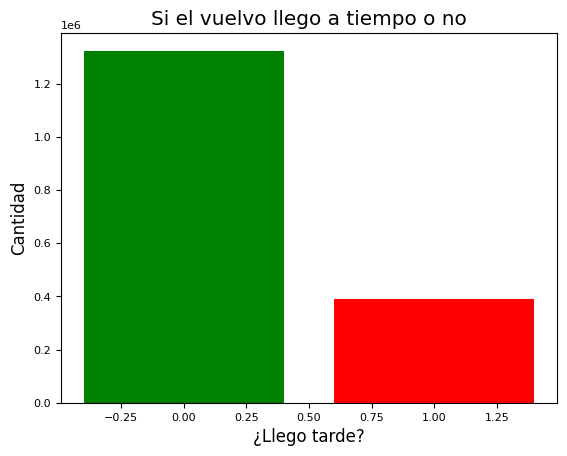

In [4]:
classDistribution = fdata['ARR_DEL15'].value_counts()

# Crear un gráfico de barras
plt.bar(classDistribution.index, classDistribution.values, color=['green', 'red'])

# Etiquetas y título
plt.xlabel('¿Llego tarde?')
plt.ylabel('Cantidad')
plt.title('Si el vuelvo llego a tiempo o no')
plt.savefig('../balanceodatos.png')
# Mostrar el gráfico
plt.show()

# PROCESAMIENTO DE DATOS

In [5]:

fdata = fdata.sample(frac=1).reset_index(drop=True)
zero = fdata[fdata['ARR_DEL15']==0].tail(classDistribution.min())
one = fdata[fdata['ARR_DEL15']==1]
data = zero.append(one)
del zero, one
data = data.sample(frac=1).reset_index(drop=True)   
print('Clases balanceada:')
print(data['ARR_DEL15'].value_counts())
len(data.columns)

Clases balanceada:
1.0    390365
0.0    390365
Name: ARR_DEL15, dtype: int64


109

In [6]:
print(data.isnull().sum())

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
                       ...  
DIV5_WHEELS_ON        780730
DIV5_TOTAL_GTIME      780730
DIV5_LONGEST_GTIME    780730
DIV5_WHEELS_OFF       780730
DIV5_TAIL_NUM         780730
Length: 109, dtype: int64


In [7]:
print('Columnas :')
print(len(data.columns))

sparsity_per_variable = ((len(data.index) - data.count()) / len(data.index))
print('Proporción de valores faltantes por variable:')
print(sparsity_per_variable)

data = data.dropna(axis=1)

print('Dimensión después de eliminar columnas con sparsity:')
print(len(data.columns))


Columnas :
109
Proporción de valores faltantes por variable:
YEAR                  0.0
QUARTER               0.0
MONTH                 0.0
DAY_OF_MONTH          0.0
DAY_OF_WEEK           0.0
                     ... 
DIV5_WHEELS_ON        1.0
DIV5_TOTAL_GTIME      1.0
DIV5_LONGEST_GTIME    1.0
DIV5_WHEELS_OFF       1.0
DIV5_TAIL_NUM         1.0
Length: 109, dtype: float64
Dimensión después de eliminar columnas con sparsity:
56


In [8]:
print(data.isnull().sum())  

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
FL_DATE                  0
OP_UNIQUE_CARRIER        0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
TAIL_NUM                 0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN_CITY_MARKET_ID    0
ORIGIN                   0
ORIGIN_CITY_NAME         0
ORIGIN_STATE_ABR         0
ORIGIN_STATE_FIPS        0
ORIGIN_STATE_NM          0
ORIGIN_WAC               0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST_CITY_MARKET_ID      0
DEST                     0
DEST_CITY_NAME           0
DEST_STATE_ABR           0
DEST_STATE_FIPS          0
DEST_STATE_NM            0
DEST_WAC                 0
CRS_DEP_TIME             0
DEP_TIME                 0
DEP_DELAY                0
DEP_DELAY_NEW            0
DEP_DEL15                0
DEP_DELAY_GROUP          0
DEP_TIME_BLK             0
TAXI_OUT                 0
W

In [9]:
data.drop(['DEP_DELAY','DEP_DEL15','ARR_DELAY','DEP_DELAY_NEW','ARR_DELAY_NEW'],
            axis=1, inplace=True)

In [10]:
data.drop(['DEP_DELAY_GROUP','ARR_DELAY_GROUP'], axis=1, inplace=True)

In [11]:
print('Dimension reduced to:')
print(len(data.columns))

Dimension reduced to:
49


<Figure size 1500x500 with 0 Axes>

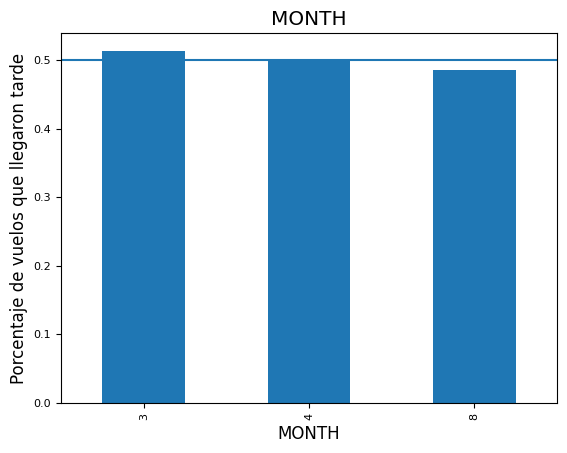

<Figure size 1500x500 with 0 Axes>

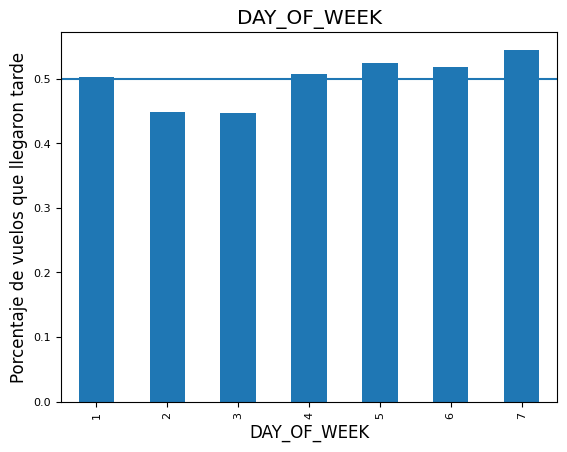

<Figure size 1500x500 with 0 Axes>

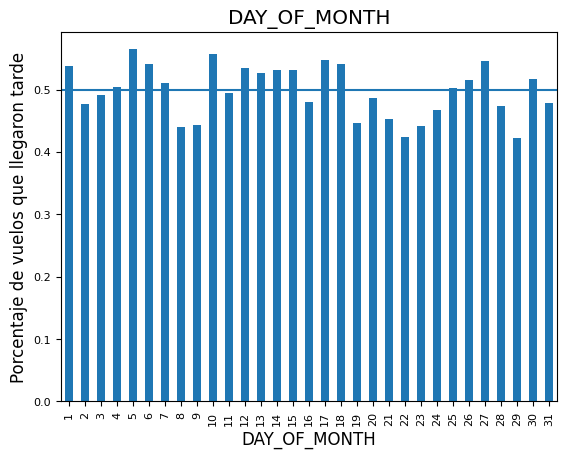

<Figure size 1500x500 with 0 Axes>

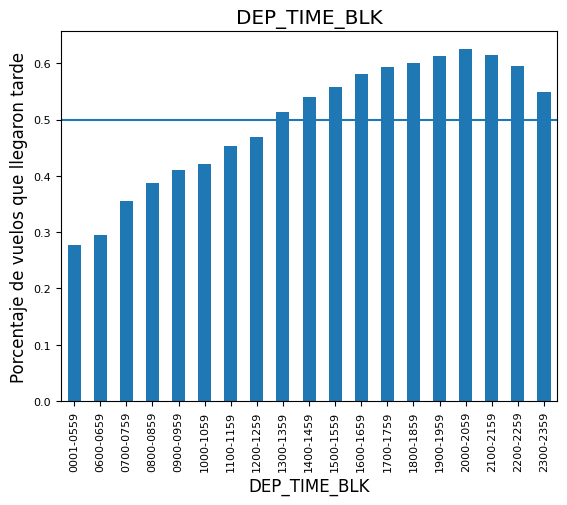

<Figure size 1500x500 with 0 Axes>

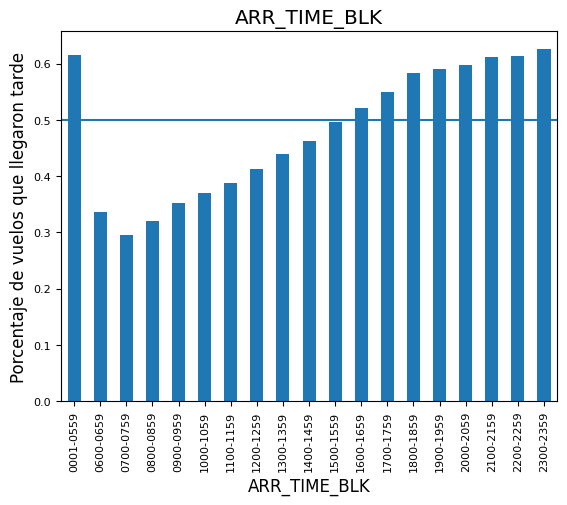

<Figure size 1500x500 with 0 Axes>

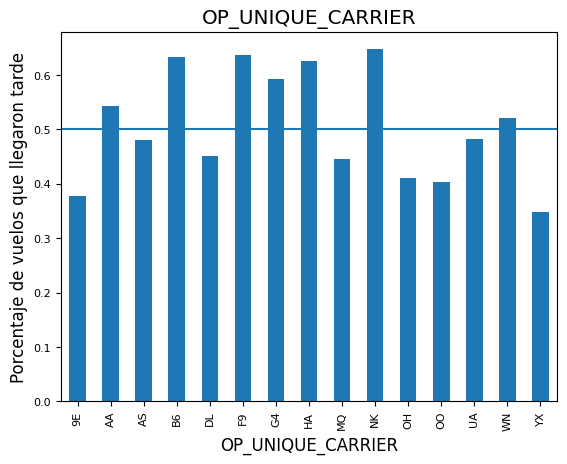

In [12]:

avgLate = np.sum(data['ARR_DEL15'])/len(data['ARR_DEL15'])
attributes = ['MONTH','DAY_OF_WEEK', 'DAY_OF_MONTH', 'DEP_TIME_BLK','ARR_TIME_BLK','OP_UNIQUE_CARRIER',
             ]
for i,pred in enumerate(attributes):
    plt.figure(i, figsize=(15, 5))
    group = data.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'ARR_DEL15']]
    group.sort_values(by=pred, inplace=True)    
    group.plot.bar(x=pred, y='ARR_DEL15')
    plt.axhline(y=avgLate, label='Average')
    plt.ylabel('Porcentaje de vuelos que llegaron tarde')
    plt.title(pred)
    plt.legend().remove()   
    plt.show()

In [13]:

data["FL_DATE"] = data["FL_DATE"].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p").strftime("%Y%m%d"))
data["FL_DATE"] = data["FL_DATE"].apply(lambda x: int(''.join(x.split("-"))))

In [14]:
data = data.sort_values(['YEAR','MONTH','DAY_OF_MONTH','DAY_OF_WEEK'], ascending=[False,False,False,False])
data

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
75,2023,3,8,31,4,20230831,AS,19930,AS,N588AS,...,1800-1859,0.0,0.0,50.0,50.0,33.0,1.0,183.0,1,0
104,2023,3,8,31,4,20230831,DL,19790,DL,N899DN,...,1700-1759,0.0,0.0,203.0,202.0,160.0,1.0,1399.0,6,0
205,2023,3,8,31,4,20230831,DL,19790,DL,N1602,...,1600-1659,0.0,0.0,145.0,136.0,93.0,1.0,760.0,4,0
218,2023,3,8,31,4,20230831,WN,19393,WN,N7889A,...,2100-2159,0.0,0.0,85.0,85.0,63.0,1.0,373.0,2,0
273,2023,3,8,31,4,20230831,WN,19393,WN,N8531Q,...,1400-1459,0.0,0.0,165.0,156.0,141.0,1.0,1052.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780017,2023,1,3,1,3,20230301,DL,19790,DL,N510DE,...,1100-1159,0.0,0.0,257.0,281.0,237.0,1.0,1535.0,7,0
780020,2023,1,3,1,3,20230301,DL,19790,DL,N536US,...,1700-1759,0.0,0.0,250.0,262.0,236.0,1.0,1623.0,7,0
780362,2023,1,3,1,3,20230301,UA,19977,UA,N78438,...,1600-1659,0.0,0.0,97.0,90.0,67.0,1.0,455.0,2,0
780407,2023,1,3,1,3,20230301,AA,19805,AA,N960NN,...,0900-0959,0.0,0.0,80.0,92.0,58.0,1.0,237.0,1,0


In [15]:
print('Datatype of variables:')
data.dtypes

Datatype of variables:


YEAR                       int64
QUARTER                    int64
MONTH                      int64
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
FL_DATE                    int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID      int64
ORIGIN                    object
ORIGIN_CITY_NAME          object
ORIGIN_STATE_ABR          object
ORIGIN_STATE_FIPS          int64
ORIGIN_STATE_NM           object
ORIGIN_WAC                 int64
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_MARKET_ID        int64
DEST                      object
DEST_CITY_NAME            object
DEST_STATE_ABR            object
DEST_STATE_FIPS            int64
DEST_STATE_NM             object
DEST_WAC                   int64
CRS_DEP_TIME               int64
DEP_TIME  

In [16]:

le = LabelEncoder()

data["Unique_Carrier"] = le.fit_transform(data["OP_UNIQUE_CARRIER"])
UniqueCarrier = list(le.classes_)
data["Carrier_Name"] = le.fit_transform(data["OP_CARRIER"])
Carrier = list(le.classes_)
data["Tail_Number"] = le.fit_transform(data["TAIL_NUM"])
TailNum = list(le.classes_)

data["Origin_Point"] = le.fit_transform(data["ORIGIN"])
Origin = list(le.classes_)
data["Origin_CityName"] = le.fit_transform(data["ORIGIN_CITY_NAME"])
OriginCityName = list(le.classes_)
data["Origin_State"] = le.fit_transform(data["ORIGIN_STATE_ABR"])
OriginState = list(le.classes_)
data["OriginState_Name"] = le.fit_transform(data["ORIGIN_STATE_NM"])
OriginStateName = list(le.classes_)

data["Destination"] = le.fit_transform(data["DEST"])
Dest = list(le.classes_)
data["Dest_CityName"] = le.fit_transform(data["DEST_CITY_NAME"])
DestCityName = list(le.classes_)
data["Dest_State"] = le.fit_transform(data["DEST_STATE_ABR"])
DestState = list(le.classes_)
data["Dest_StateName"] = le.fit_transform(data["DEST_STATE_NM"])
DestStateName = list(le.classes_)

data["DepTime_Blk"] = le.fit_transform(data["DEP_TIME_BLK"])
DepTimeBlk = list(le.classes_)
data["ArrTime_Blk"] = le.fit_transform(data["ARR_TIME_BLK"])
ArrTimeBlk = list(le.classes_)

In [17]:
data.drop(['OP_UNIQUE_CARRIER','OP_CARRIER','TAIL_NUM',
           'ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_ABR','ORIGIN_STATE_NM',
          'DEST','DEST_CITY_NAME','DEST_STATE_ABR','DEST_STATE_NM',
          'DEP_TIME_BLK','ARR_TIME_BLK'], axis=1, inplace=True)


In [18]:
print('Dimension reduced to:')
print(len(data.columns))
data.describe()

Dimension reduced to:
49


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,...,Origin_Point,Origin_CityName,Origin_State,OriginState_Name,Destination,Dest_CityName,Dest_State,Dest_StateName,DepTime_Blk,ArrTime_Blk
count,780730.0,780730.000000,780730.000000,780730.000000,780730.000000,7.807300e+05,780730.000000,780730.000000,780730.000000,7.807300e+05,...,780730.000000,780730.000000,780730.000000,780730.000000,780730.000000,780730.00000,780730.000000,780730.000000,780730.000000,780730.000000
mean,2023.0,2.000223,5.018001,15.772718,4.042873,2.023052e+07,19941.059170,2220.830907,12631.879032,1.263192e+06,...,166.870724,164.688950,21.662175,21.577627,168.530953,166.70691,21.638618,21.546518,8.616289,10.114889
std,0.0,0.823588,2.175056,8.816576,1.976098,2.174779e+02,374.263269,1533.930983,1518.969250,1.518967e+05,...,92.383024,96.811148,15.346886,15.356499,92.534257,96.61106,15.379617,15.384484,4.901984,5.098458
min,2023.0,1.000000,3.000000,1.000000,1.000000,2.023030e+07,19393.000000,1.000000,10135.000000,1.013506e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,1.000000,3.000000,8.000000,2.000000,2.023032e+07,19790.000000,995.000000,11292.000000,1.129202e+06,...,90.000000,77.000000,7.000000,7.000000,90.000000,78.00000,7.000000,7.000000,4.000000,6.000000
50%,2023.0,2.000000,4.000000,16.000000,4.000000,2.023042e+07,19805.000000,1977.000000,12889.000000,1.288904e+06,...,181.000000,179.000000,20.000000,20.000000,181.000000,179.00000,20.000000,20.000000,9.000000,11.000000
75%,2023.0,3.000000,8.000000,23.000000,6.000000,2.023081e+07,20363.000000,3112.000000,13930.000000,1.393008e+06,...,237.000000,245.000000,35.000000,35.000000,245.000000,246.00000,35.000000,35.000000,13.000000,14.000000
max,2023.0,3.000000,8.000000,31.000000,7.000000,2.023083e+07,20452.000000,8819.000000,16869.000000,1.686902e+06,...,346.000000,340.000000,51.000000,51.000000,346.000000,340.00000,51.000000,51.000000,18.000000,18.000000


In [19]:
data.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_STATE_FIPS',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST_STATE_FIPS', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'DIV_AIRPORT_LANDINGS', 'Unique_Carrier',
       'Carrier_Name', 'Tail_Number', 'Origin_Point', 'Origin_CityName',
       'Origin_State', 'OriginState_Name', 'Destination', 'Dest_CityName',
       'Dest_State', 'Dest_StateName', 'DepTime_Blk', 'ArrTime_Blk'],
      dtype='object')

In [20]:
Delay_YesNo = data['ARR_DEL15']
data.drop(['ARR_DEL15'], axis=1, inplace=True)#Removing target variable
print('Dimension reduced to:')
print(len(data.columns))

Dimension reduced to:
48


# ENTRENAMIENTO

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_STATE_FIPS',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST_STATE_FIPS', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'DIV_AIRPORT_LANDINGS', 'Unique_Carrier',
       'Carrier_Name', 'Tail_Number', 'Origin_Point', 'Origin_CityName',
       'Origin_State', 'OriginState_Name', 'Destination', 'Dest_CityName',
       'Dest_State', 'Dest_StateName', 'DepTime_Blk', 'ArrTime_Blk'],
      dtype='object')

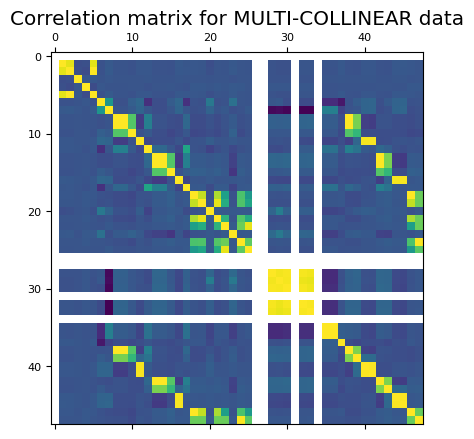

In [24]:
plt.matshow(data.corr())
plt.title('Correlation matrix for MULTI-COLLINEAR data')
corr = data.corr()

## ENTRENAMIENTO PARTE 1 
    

In [25]:
from sklearn.metrics import roc_curve, auc


In [26]:
dataset1 = data.copy()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(dataset1, Delay_YesNo, test_size=0.2, random_state=42)

In [28]:
x_train

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,...,Origin_Point,Origin_CityName,Origin_State,OriginState_Name,Destination,Dest_CityName,Dest_State,Dest_StateName,DepTime_Blk,ArrTime_Blk
402001,2023,2,4,28,5,20230428,19393,2297,14908,1490803,...,309,284,4,4,302,280,4,4,14,15
466257,2023,2,4,5,3,20230405,19977,2658,12266,1226603,...,159,144,43,42,203,235,7,7,9,13
744218,2023,1,3,10,5,20230310,19805,1456,14869,1486903,...,305,275,44,45,91,78,43,42,11,14
692746,2023,2,4,6,4,20230406,19977,303,13198,1319801,...,202,164,22,23,237,61,12,11,3,4
178208,2023,3,8,19,6,20230819,20398,3821,11540,1154005,...,105,95,43,42,250,246,3,2,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228435,2023,3,8,1,2,20230801,20304,5655,10800,1080003,...,54,47,4,4,296,279,4,4,5,7
719950,2023,2,4,19,3,20230419,20409,327,11618,1161802,...,111,224,29,28,203,235,7,7,0,3
254642,2023,3,8,15,2,20230815,19393,3475,13232,1323202,...,206,61,12,11,81,63,15,15,15,18
77643,2023,1,3,13,1,20230313,20452,3537,14122,1412202,...,255,247,36,36,111,224,29,28,2,3


### REGRESION LOGISTICA

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Dividir los datos en desarrollo y conjunto final de entrenamiento
x_train_final, x_dev, y_train_final, y_dev = train_test_split(dataset1, Delay_YesNo, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
x_train_final_scaled = scaler.fit_transform(x_train_final)
x_dev_scaled = scaler.transform(x_dev)

# Crear el clasificador de Regresión Logística
logistic_regression = LogisticRegression()

# Definir el espacio de búsqueda de hiperparámetros
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Utilizar validación cruzada estratificada en el conjunto final de entrenamiento
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar búsqueda en cuadrícula para encontrar los mejores parámetros
grid_logistic = GridSearchCV(logistic_regression, param_grid_logistic, cv=kf, verbose=1, n_jobs=-1)
with tqdm(desc="Grid Search Progress") as pbar:
    grid_logistic.fit(x_train_final_scaled, y_train_final)
    pbar.update()

# Obtener el mejor modelo y los mejores parámetros
bestModel_logistic = grid_logistic.best_estimator_
bestParameters_logistic = grid_logistic.best_params_

# Imprimir el mejor modelo y los mejores parámetros
print("Best Logistic Regression Model:")
print(bestModel_logistic)
print("\nBest Logistic Regression Parameters:")
print(bestParameters_logistic)


Grid Search Progress: 0it [00:00, ?it/s]

Fitting 5 folds for each of 60 candidates, totalling 300 fits


Grid Search Progress: 1it [56:00, 3360.45s/it]

Best Logistic Regression Model:
LogisticRegression(C=10)

Best Logistic Regression Parameters:
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [30]:
bestModel = grid_logistic.best_estimator_
bestParameters = grid_logistic.best_params_
gridScores = grid_logistic.cv_results_

In [31]:
print(bestModel)
print(bestParameters)
gridScores

LogisticRegression(C=10)
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


{'mean_fit_time': array([3.48267841e-01, 3.52257109e-01, 2.03995102e+02, 3.83374119e-01,
        1.26250225e+01, 3.06129933e+01, 1.09405277e+01, 1.81280978e+01,
        7.41196861e+00, 8.80344582e+00, 2.52524328e-01, 2.79252434e-01,
        1.16518138e+03, 4.02123833e-01, 7.26229393e+01, 3.99117985e+01,
        1.59759473e+01, 4.04423744e+01, 1.13700101e+01, 1.17886735e+01,
        3.75432014e-01, 3.64665079e-01, 5.15774584e+02, 4.02362537e-01,
        8.44764753e+01, 4.25286325e+01, 1.48846228e+01, 2.67497465e+01,
        9.43248415e+00, 1.02423615e+01, 2.33351707e-01, 2.89140606e-01,
        4.03787298e+02, 3.76484203e-01, 1.58522196e+01, 5.57441429e+01,
        1.49387340e+01, 2.83323597e+01, 9.80954638e+00, 9.70097184e+00,
        2.73940849e-01, 2.74154663e-01, 3.80843588e+02, 3.97574615e-01,
        1.57629331e+01, 4.97049460e+01, 1.48093628e+01, 2.88505328e+01,
        1.11280353e+01, 1.02255398e+01, 2.58168888e-01, 2.66580105e-01,
        4.40173188e+02, 3.79116678e-01, 1.60838

Confusion matrix (Development):
[[56839 21095]
 [26744 51468]]
Accuracy (Development): 69.36%
Recall (Development): 65.81%
Area under the ROC curve: 0.76


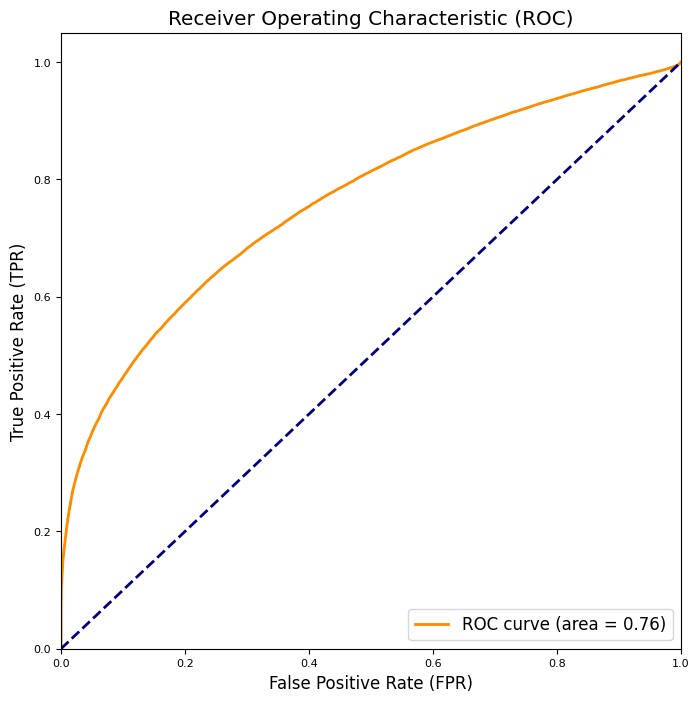

In [32]:
# Evaluar el modelo de Regresión Logística en el conjunto de desarrollo
y_logistic_pred_dev = bestModel_logistic.predict(x_dev_scaled)
y_logistic_pred_dev_probs = bestModel_logistic.predict_proba(x_dev_scaled)[:, 1]

# Calcular métricas de rendimiento en el conjunto de desarrollo
cm_logistic_dev = confusion_matrix(y_dev, y_logistic_pred_dev)
print('Confusion matrix (Development):')
print(cm_logistic_dev)

# Calcular e imprimir el accuracy y recall
accuracy_dev = (cm_logistic_dev[0, 0] + cm_logistic_dev[1, 1]) / np.sum(cm_logistic_dev)
recall_dev = cm_logistic_dev[1, 1] / (cm_logistic_dev[1, 0] + cm_logistic_dev[1, 1])

print('Accuracy (Development): {:.2%}'.format(accuracy_dev))
print('Recall (Development): {:.2%}'.format(recall_dev))

# Calcular métricas de rendimiento en el conjunto de desarrollo
fpr, tpr, thresholds = roc_curve(y_dev, y_logistic_pred_dev_probs)
roc_auc = auc(fpr, tpr)

# Imprimir métricas
print('Area under the ROC curve: {:.2f}'.format(roc_auc))

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('roc_logistic_regression.png')

plt.show()


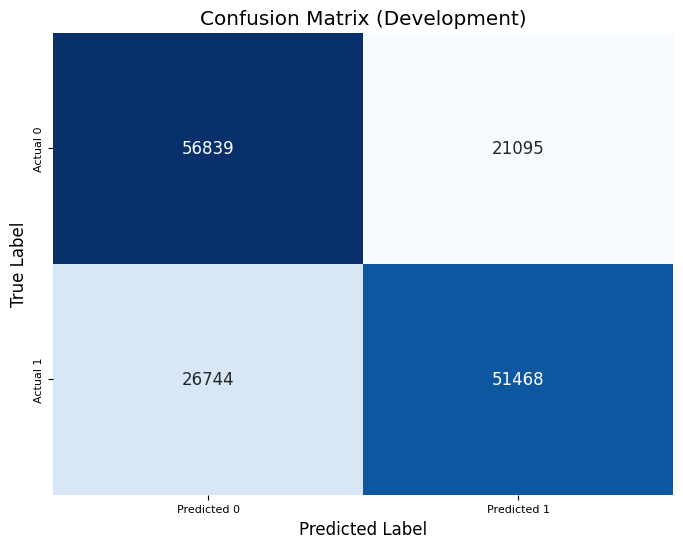

In [33]:

# Crear un DataFrame de la matriz de confusión para utilizar con seaborn
confusion_df = pd.DataFrame(cm_logistic_dev, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Mostrar la matriz de confusión con un diagrama utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Development)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Guardar la imagen de la matriz de confusión como un archivo PNG
plt.savefig('confusion_matrix_logistic_regression.png')

plt.show()

Feature Importance:
                  Feature  Coefficient
28       CRS_ELAPSED_TIME    -3.922790
29    ACTUAL_ELAPSED_TIME     2.076765
30               AIR_TIME     2.046291
47            ArrTime_Blk     0.880632
18           CRS_DEP_TIME    -0.814314
19               DEP_TIME     0.709078
45         Dest_StateName    -0.708576
41       OriginState_Name    -0.670059
46            DepTime_Blk     0.610409
24           CRS_ARR_TIME    -0.605411
20               TAXI_OUT     0.532992
40           Origin_State     0.387971
44             Dest_State     0.347347
16        DEST_STATE_FIPS     0.323773
23                TAXI_IN     0.229162
11      ORIGIN_STATE_FIPS     0.218183
38           Origin_Point     0.189054
22              WHEELS_ON    -0.175839
32               DISTANCE    -0.166894
7       OP_CARRIER_FL_NUM    -0.156070
42            Destination     0.135698
9   ORIGIN_AIRPORT_SEQ_ID    -0.131782
8       ORIGIN_AIRPORT_ID    -0.131542
4             DAY_OF_WEEK     0.097808
25   

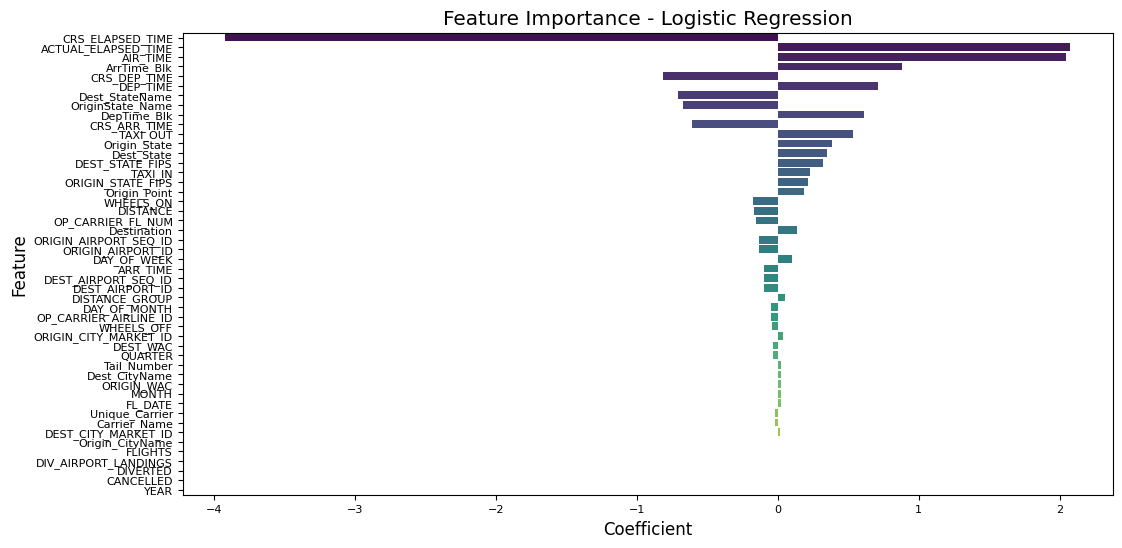

In [34]:
# Obtener los coeficientes del mejor modelo de Regresión Logística
coefficients = bestModel_logistic.coef_[0]

# Crear un DataFrame para mostrar la importancia de cada característica
feature_importance_df = pd.DataFrame({'Feature': x_train_final.columns, 'Coefficient': coefficients})

# Calcular el valor absoluto de los coeficientes para la importancia relativa
feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Imprimir el DataFrame
print("Feature Importance:")
print(feature_importance_df[['Feature', 'Coefficient']])

# Graficar la importancia de las características
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()



### RANDOM FOREST

In [35]:

rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10, 25],
                 "criterion" : ["gini", "entropy"]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=10,verbose=1,n_jobs=-1)
grid_rf.fit(x_train, y_train)
bestModel = grid_rf.best_estimator_
bestParameters = grid_rf.best_params_
gridScores = grid_rf.cv_results_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [36]:
print(bestModel)
print(bestParameters)
gridScores

RandomForestClassifier(criterion='entropy', n_estimators=25)
{'criterion': 'entropy', 'n_estimators': 25}


{'mean_fit_time': array([34.36974318, 83.77761781, 35.66912944, 82.24537373]),
 'std_fit_time': array([0.87139079, 1.07830077, 0.96901256, 7.04416986]),
 'mean_score_time': array([0.3625247 , 0.78078029, 0.30948024, 0.65830891]),
 'std_score_time': array([0.05193084, 0.01676193, 0.00940165, 0.10892861]),
 'param_criterion': masked_array(data=['gini', 'gini', 'entropy', 'entropy'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 25, 10, 25],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'n_estimators': 10},
  {'criterion': 'gini', 'n_estimators': 25},
  {'criterion': 'entropy', 'n_estimators': 10},
  {'criterion': 'entropy', 'n_estimators': 25}],
 'split0_test_score': array([0.93698266, 0.95446613, 0.94303463, 0.95480235]),
 'split1_test_score': array([0.93739893, 0.9521286 , 0.94108135, 0.95164828]),


In [37]:

rf = RandomForestClassifier(n_estimators = bestParameters.get('n_estimators'), 
#                            min_samples_split=bestParameters.get('min_samples_split'),
#                           min_samples_leaf = bestParameters.get('min_samples_leaf'),
#                           max_features = bestParameters.get('max_features'),
                           criterion = bestParameters.get('criterion'))
cv = KFold(n_splits=3, shuffle=True, random_state=2)
cvScores = cross_validate(rf, x_train, y_train, cv=cv, scoring='accuracy', return_train_score=False)
print('Mean cross validation score is:', np.mean(cvScores['test_score']))
rf.fit(x_train, y_train)

Mean cross validation score is: 0.9489131973847451


RandomForestClassifier(criterion='entropy', n_estimators=25)

Accuracy: 95.45%
Recall: 95.78%
Confusion matrix:
[[74129  3805]
 [ 3301 74911]]


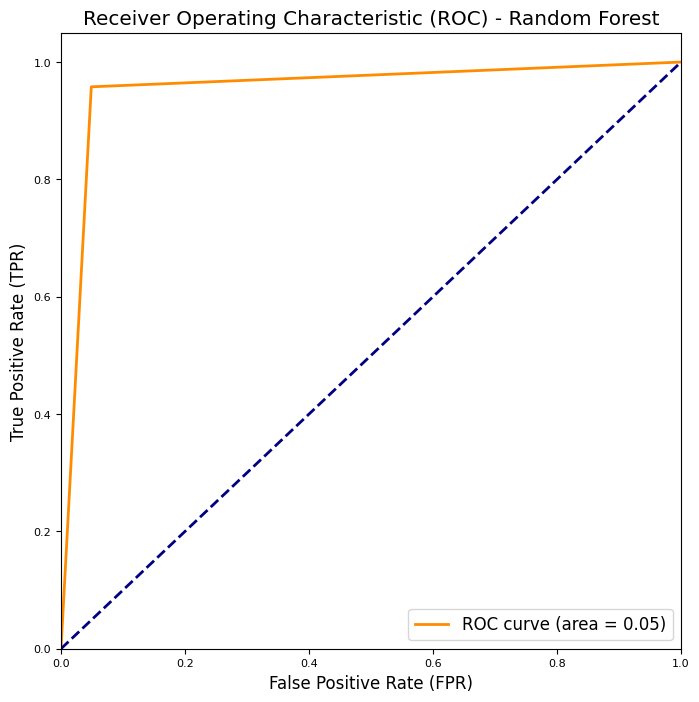

In [38]:
# Predicciones del modelo de Random Forest en el conjunto de prueba
y_rf_pred = rf.predict(x_test)

# Calcular métricas de rendimiento
labels = [0, 1]
cm_rf = confusion_matrix(y_test, y_rf_pred, labels=labels)

# Imprimir métricas de rendimiento
print('Accuracy: ' + str(np.round(100 * float(cm_rf[0][0] + cm_rf[1][1]) / float((cm_rf[0][0] + cm_rf[1][1] + cm_rf[1][0] + cm_rf[0][1])), 2)) + '%')
print('Recall: ' + str(np.round(100 * float((cm_rf[1][1])) / float((cm_rf[1][0] + cm_rf[1][1])), 2)) + '%')
print('Confusion matrix:')
print(cm_rf)

# Calcular curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_pred)
auc_rf = np.trapz(fpr_rf, tpr_rf)

# Gráfico de la curva ROC para Random Forest
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")

# Guardar la imagen de la curva ROC como un archivo PNG
plt.savefig('roc_random_forest.png')

plt.show()

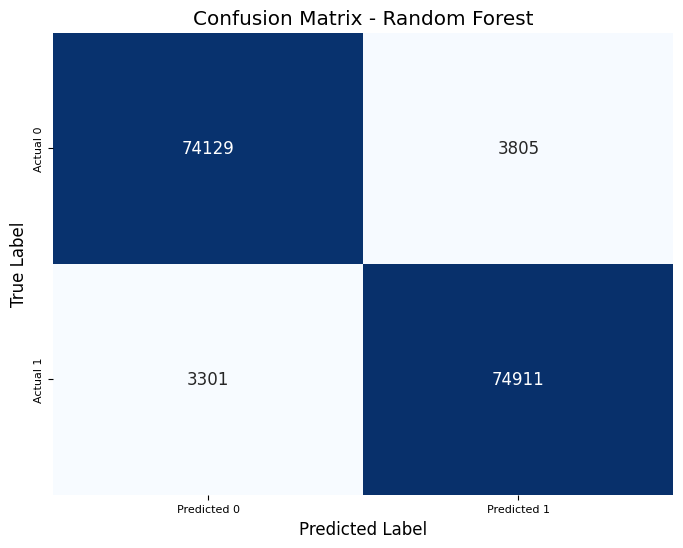

In [39]:
# Crear un DataFrame de la matriz de confusión para utilizar con seaborn
confusion_df_rf = pd.DataFrame(cm_rf, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Mostrar la matriz de confusión con un diagrama utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Guardar la imagen de la matriz de confusión como un archivo PNG
plt.savefig('confusion_matrix_random_forest.png')

plt.show()

Feature Importance:
                  Feature  Importance
24           CRS_ARR_TIME    0.113838
25               ARR_TIME    0.108623
18           CRS_DEP_TIME    0.089665
21             WHEELS_OFF    0.089049
22              WHEELS_ON    0.088550
19               DEP_TIME    0.074968
20               TAXI_OUT    0.048856
47            ArrTime_Blk    0.048647
46            DepTime_Blk    0.040578
29    ACTUAL_ELAPSED_TIME    0.027412
23                TAXI_IN    0.023120
30               AIR_TIME    0.018857
28       CRS_ELAPSED_TIME    0.017852
7       OP_CARRIER_FL_NUM    0.015551
37            Tail_Number    0.013958
32               DISTANCE    0.013811
5                 FL_DATE    0.012906
3            DAY_OF_MONTH    0.011470
4             DAY_OF_WEEK    0.007723
6   OP_CARRIER_AIRLINE_ID    0.007333
15    DEST_CITY_MARKET_ID    0.006767
43          Dest_CityName    0.006571
10  ORIGIN_CITY_MARKET_ID    0.006426
39        Origin_CityName    0.006424
12             ORIGIN_WAC    0

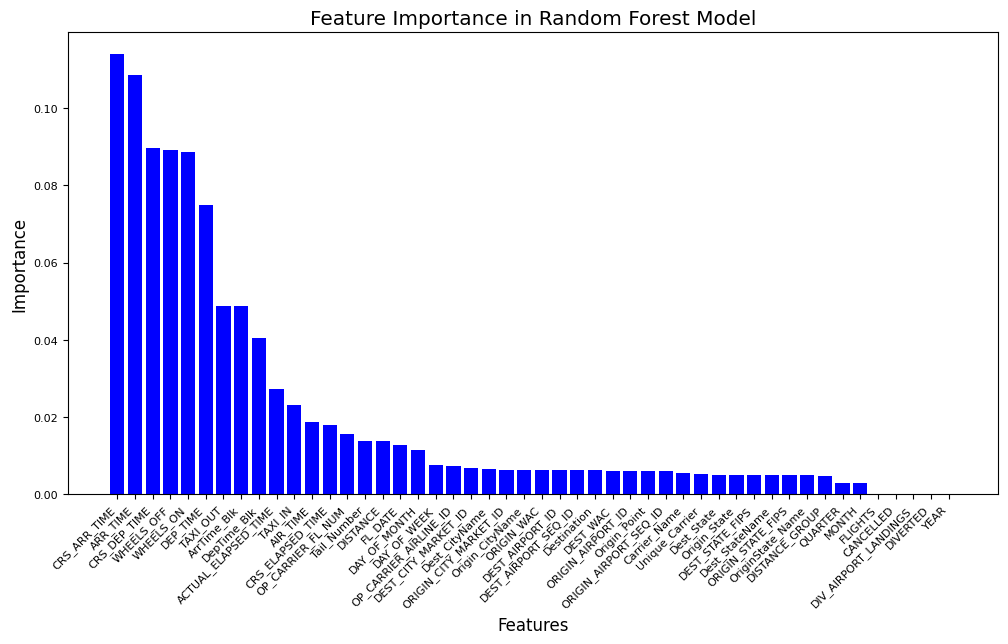

In [40]:
# Después de entrenar el modelo de Random Forest, puedes obtener la importancia de las características
feature_importance = rf.feature_importances_

# Crear un DataFrame para mostrar la importancia de cada característica
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Imprimir el DataFrame
print("Feature Importance:")
print(feature_importance_df)

# Graficar la importancia de las características
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.xticks(rotation=45, ha='right')
plt.show()


### NAIVE BAYES

In [41]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(dataset1, Delay_YesNo, test_size=0.2, random_state=42)
# Utilizar validación cruzada para encontrar los mejores parámetros
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy',verbose=1)
grid_search.fit(x_train, y_train)

# Obtener el mejor modelo y los mejores parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Imprimir los mejores parámetros
print("Best Naive Bayes Model:")
print(best_model)
print("\nBest Parameters:")
print(best_params)

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(x_test)

# Imprimir métricas de rendimiento
print("\nAccuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Naive Bayes Model:
GaussianNB()

Best Parameters:
{'var_smoothing': 1e-09}

Accuracy on Test Set: 0.6389340745200005

Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.70      0.66     77934
         1.0       0.66      0.58      0.61     78212

    accuracy                           0.64    156146
   macro avg       0.64      0.64      0.64    156146
weighted avg       0.64      0.64      0.64    156146



Accuracy: 63.89%
Recall: 57.5%
Confusion matrix:
[[54792 23142]
 [33237 44975]]


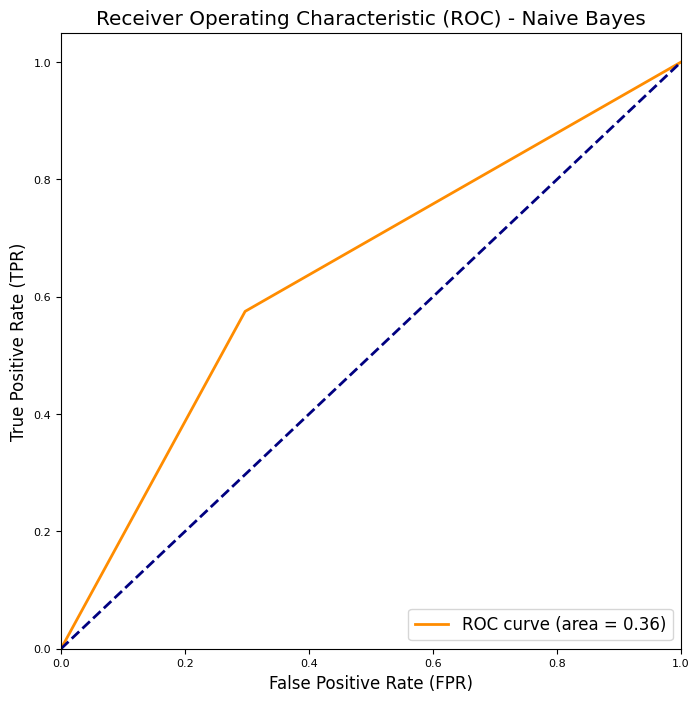

In [42]:
# Evaluar el modelo Naive Bayes en el conjunto de prueba
y_pred_naive_bayes = best_model.predict(x_test)

# Calcular métricas de rendimiento
cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes, labels=labels)
accuracy_naive_bayes = np.round(100 * float(cm_naive_bayes[0][0] + cm_naive_bayes[1][1]) / float((cm_naive_bayes[0][0] + cm_naive_bayes[1][1] + cm_naive_bayes[1][0] + cm_naive_bayes[0][1])), 2)
recall_naive_bayes = np.round(100 * float((cm_naive_bayes[1][1])) / float((cm_naive_bayes[1][0] + cm_naive_bayes[1][1])), 2)

# Imprimir métricas de rendimiento
print('Accuracy: ' + str(accuracy_naive_bayes) + '%')
print('Recall: ' + str(recall_naive_bayes) + '%')
print('Confusion matrix:')
print(cm_naive_bayes)

# Calcular curva ROC
fpr_naive_bayes, tpr_naive_bayes, _ = roc_curve(y_test, y_pred_naive_bayes)
auc_naive_bayes = np.trapz(fpr_naive_bayes, tpr_naive_bayes)

# Gráfico de la curva ROC para Naive Bayes
plt.figure(figsize=(8, 8))
plt.plot(fpr_naive_bayes, tpr_naive_bayes, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_naive_bayes))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes')
plt.legend(loc="lower right")

# Guardar la imagen de la curva ROC como un archivo PNG
plt.savefig('roc_naive_bayes.png')

plt.show()



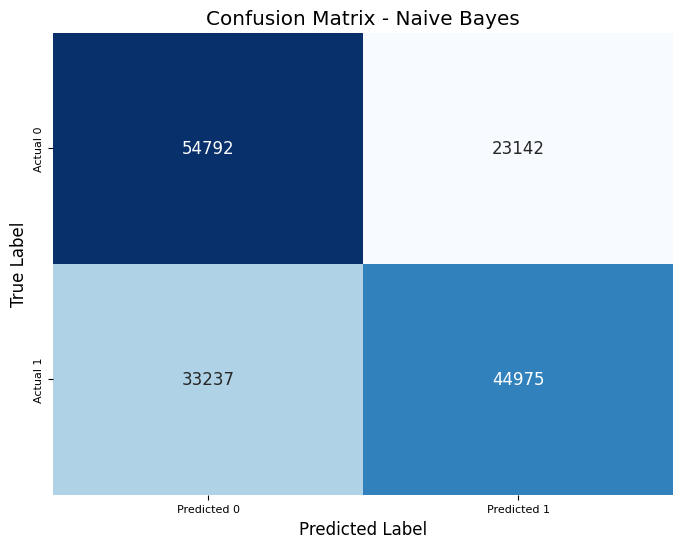

In [43]:
# Crear un DataFrame de la matriz de confusión para utilizar con seaborn
confusion_df_naive_bayes = pd.DataFrame(cm_naive_bayes, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Mostrar la matriz de confusión con un diagrama utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df_naive_bayes, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Guardar la imagen de la matriz de confusión como un archivo PNG
plt.savefig('confusion_matrix_naive_bayes.png')

plt.show()

### GRADIENT BOOSTING

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Crear el clasificador Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
x_train, x_test, y_train, y_test = train_test_split(dataset1, Delay_YesNo, test_size=0.2, random_state=42)

# Realizar búsqueda en cuadrícula para encontrar los mejores parámetros
grid_gradient_boosting = RandomizedSearchCV(gradient_boosting, param_distributions=param_grid_gradient_boosting, cv=10, verbose=1, random_state=42,n_jobs=-1)
grid_gradient_boosting.fit(x_train[:10000], y_train[:10000])

# Obtener el mejor modelo y los mejores parámetros
bestModel_gradient_boosting = grid_gradient_boosting.best_estimator_
bestParameters_gradient_boosting = grid_gradient_boosting.best_params_

# Imprimir el mejor modelo y los mejores parámetros
print("Best Gradient Boosting Model:")
print(bestModel_gradient_boosting)
print("\nBest Gradient Boosting Parameters:")
print(bestParameters_gradient_boosting)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Gradient Boosting Model:
GradientBoostingClassifier(max_depth=5, n_estimators=150)

Best Gradient Boosting Parameters:
{'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1}


Accuracy: 92.78%
Recall: 91.38%
Confusion matrix:
[[73402  4532]
 [ 6738 71474]]
Area under the ROC curve: 0.07215111614525886


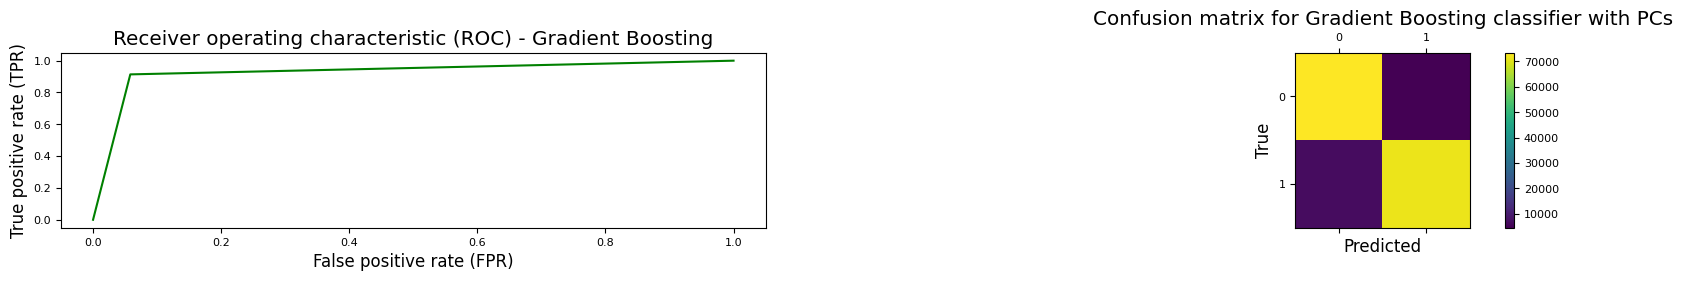

In [61]:
gradient_boosting = bestModel_gradient_boosting
# Evaluar el modelo Gradient Boosting en el conjunto de prueba
y_gradient_boosting_pred = gradient_boosting.predict(x_test)

# Calcular métricas de rendimiento
cm_gradient_boosting = confusion_matrix(y_test, y_gradient_boosting_pred, labels=labels)
print('Accuracy: ' + str(np.round(100 * float(cm_gradient_boosting[0][0] + cm_gradient_boosting[1][1]) / float((cm_gradient_boosting[0][0] + cm_gradient_boosting[1][1] + cm_gradient_boosting[1][0] + cm_gradient_boosting[0][1])), 2)) + '%')
print('Recall: ' + str(np.round(100 * float((cm_gradient_boosting[1][1])) / float((cm_gradient_boosting[1][0] + cm_gradient_boosting[1][1])), 2)) + '%')
print('Confusion matrix:')
print(cm_gradient_boosting)

fpr_gradient_boosting, tpr_gradient_boosting, _ = roc_curve(y_test, y_gradient_boosting_pred)
auc_gradient_boosting = np.trapz(fpr_gradient_boosting, tpr_gradient_boosting)
print('Area under the ROC curve: ' + str(auc_gradient_boosting))

# Gráficos para Gradient Boosting
fig_gradient_boosting = plt.figure(figsize=(20, 5))

plt.subplot2grid((2, 2), (1, 0), colspan=1)
plt.plot(fpr_gradient_boosting, tpr_gradient_boosting, color='green')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC) - Gradient Boosting')

ax1_gradient_boosting = plt.subplot2grid((2, 2), (1, 1))
cax_gradient_boosting = ax1_gradient_boosting.matshow(cm_gradient_boosting)
plt.title('Confusion matrix for Gradient Boosting classifier with PCs')
fig_gradient_boosting.colorbar(cax_gradient_boosting)
ax1_gradient_boosting.set_xticklabels([''] + labels)
ax1_gradient_boosting.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Feature Importance for Gradient Boosting:
                  Feature  Importance
18           CRS_DEP_TIME    0.205010
19               DEP_TIME    0.157165
24           CRS_ARR_TIME    0.142670
25               ARR_TIME    0.132713
20               TAXI_OUT    0.080887
22              WHEELS_ON    0.067621
21             WHEELS_OFF    0.049175
28       CRS_ELAPSED_TIME    0.027582
29    ACTUAL_ELAPSED_TIME    0.023865
23                TAXI_IN    0.023560
7       OP_CARRIER_FL_NUM    0.013057
6   OP_CARRIER_AIRLINE_ID    0.009360
30               AIR_TIME    0.008491
47            ArrTime_Blk    0.007323
37            Tail_Number    0.005564
5                 FL_DATE    0.005493
46            DepTime_Blk    0.003221
17               DEST_WAC    0.003079
3            DAY_OF_MONTH    0.002863
4             DAY_OF_WEEK    0.002751
39        Origin_CityName    0.002707
41       OriginState_Name    0.002484
32               DISTANCE    0.002464
43          Dest_CityName    0.002212
15    DE

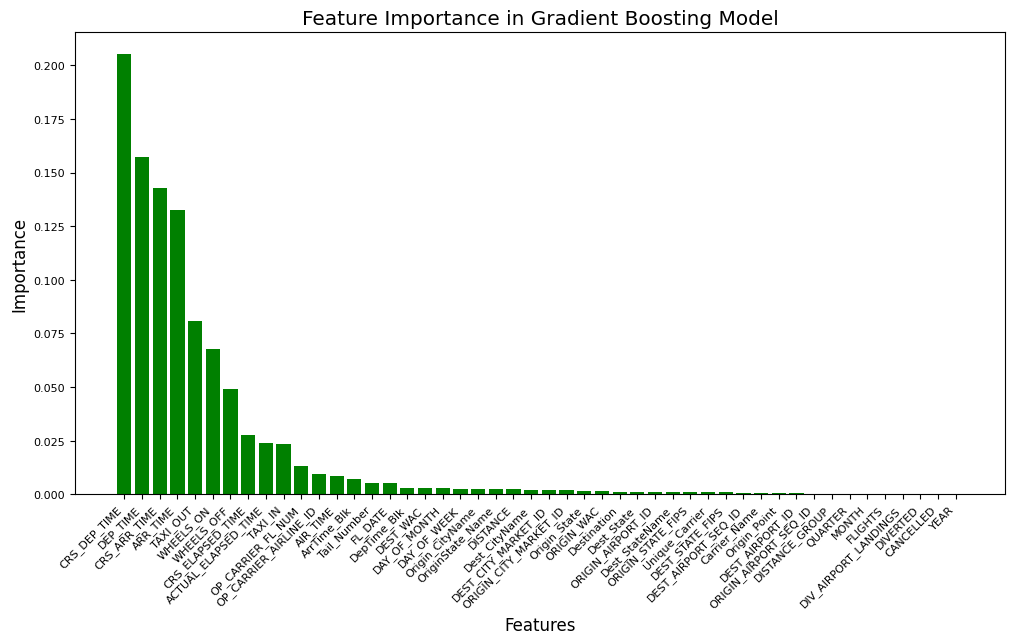

In [62]:
# Obtener la importancia de las características desde el modelo Gradient Boosting
feature_importance_gb = bestModel_gradient_boosting.feature_importances_

# Crear un DataFrame para mostrar la importancia de las características
feature_importance_gb_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance_gb})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_gb_df = feature_importance_gb_df.sort_values(by='Importance', ascending=False)

# Imprimir el DataFrame
print("Feature Importance for Gradient Boosting:")
print(feature_importance_gb_df)

# Graficar la importancia de las características
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_gb_df['Feature'], feature_importance_gb_df['Importance'], color='green')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.xticks(rotation=45, ha='right')
plt.show()



## ENTRENAMIENTO PARTE 2

In [47]:
from sklearn.preprocessing import StandardScaler
dataset1_scaled = dataset1.copy()

X = dataset1_scaled 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dataset1_scaled[X.columns] = X_scaled



In [48]:
dataset1_scaled

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,...,Origin_Point,Origin_CityName,Origin_State,OriginState_Name,Destination,Dest_CityName,Dest_State,Dest_StateName,DepTime_Blk,ArrTime_Blk
75,0.0,1.213930,1.371000,1.727121,-0.021696,1.441192,-0.029549,-1.348061,0.817082,0.817096,...,0.737466,0.643635,-1.411504,-1.339996,0.783160,0.054788,-1.406968,-1.335536,0.690274,0.565880
104,0.0,1.213930,1.371000,1.727121,-0.021696,1.441192,-0.403618,-0.879330,1.392472,1.392468,...,1.376112,1.335705,1.716168,1.720600,0.610251,0.406714,-0.041524,-0.035524,-0.533721,0.369742
205,0.0,1.213930,1.371000,1.727121,-0.021696,1.441192,-0.403618,-0.419726,-1.471314,-1.471296,...,-1.589803,-1.515208,-0.890225,-0.884162,0.037489,0.582678,0.673709,0.549481,-0.125722,0.173604
218,0.0,1.213930,1.371000,1.727121,-0.021696,1.441192,-1.464369,-0.156351,1.488590,1.488579,...,1.516830,1.098129,-1.150865,-1.144638,0.156364,0.241102,-1.146884,-1.140534,1.098273,1.154293
273,0.0,1.213930,1.371000,1.727121,-0.021696,1.441192,-1.464369,-0.085291,1.224595,1.224584,...,1.127148,0.963847,0.217492,0.613576,-0.902704,-0.928537,1.388942,1.329489,-0.329722,-0.218672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780017,0.0,-1.214471,-0.927793,-1.675563,-0.527744,-0.995839,-0.403618,-0.954953,0.562962,0.562950,...,0.629221,0.426718,-0.043147,-0.037615,0.156364,0.241102,-1.146884,-1.140534,-0.941719,-0.807085
780020,0.0,-1.214471,-0.927793,-1.675563,-0.527744,-0.995839,-0.403618,-0.189599,1.574833,1.574828,...,1.625075,-1.122691,1.585849,1.460124,0.037489,0.582678,0.673709,0.549481,0.078277,0.369742
780362,0.0,-1.214471,-0.927793,-1.675563,-0.527744,-0.995839,0.096031,0.151356,-1.324504,-1.324512,...,-1.427435,-1.360267,0.152332,0.157743,-0.848670,-0.856082,-1.081862,-1.075534,0.078277,0.173604
780407,0.0,-1.214471,-0.927793,-1.675563,-0.527744,-0.995839,-0.363539,-0.265873,1.802619,1.802608,...,1.754969,1.604269,0.803931,0.808933,-0.837863,-0.918186,1.388942,1.329489,-1.145718,-1.199361


In [49]:
pca = PCA(n_components=22,random_state=42)
data_reduced = pca.fit_transform(dataset1_scaled)
print(pca.explained_variance_ratio_)
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)


[0.13430049 0.12583061 0.09711502 0.09529406 0.07040728 0.06966505
 0.06773166 0.04745516 0.03587355 0.03289632 0.02746907 0.02348107
 0.0231735  0.02267518 0.02172879 0.01868478 0.01452741 0.01168887
 0.01076858 0.01039748 0.01029499 0.00841096]


array([13.43, 26.01, 35.72, 45.25, 52.29, 59.26, 66.03, 70.78, 74.37,
       77.66, 80.41, 82.76, 85.08, 87.35, 89.52, 91.39, 92.84, 94.01,
       95.09, 96.13, 97.16, 98.  ])

Text(0, 0.5, 'Explained variance')

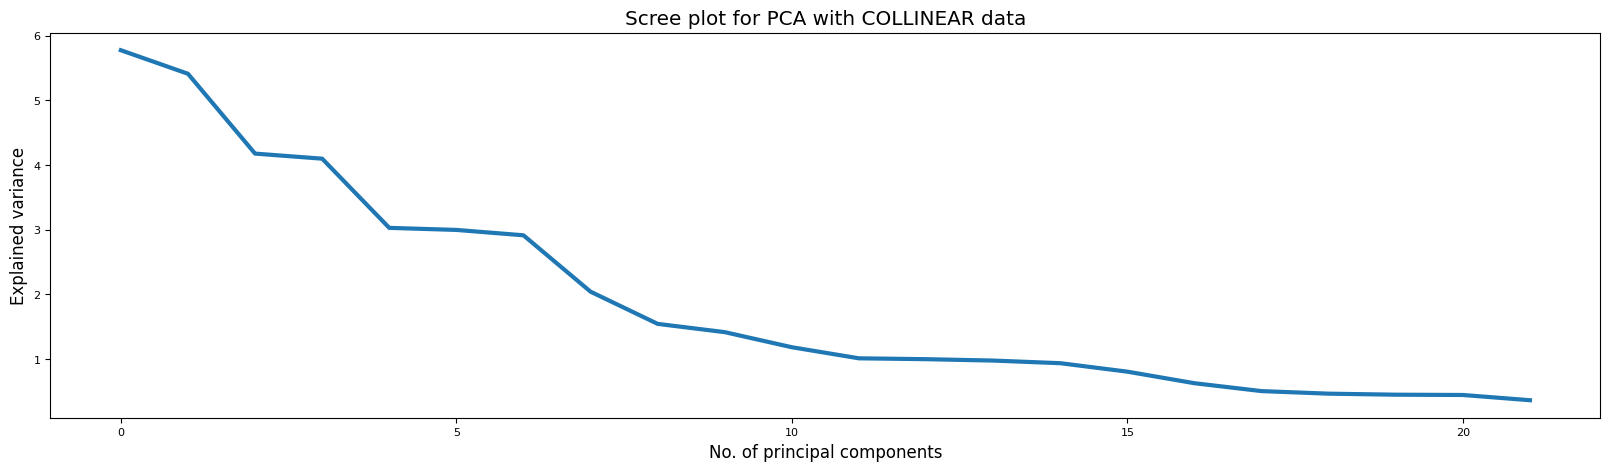

In [50]:
plt.figure(1, figsize=(20, 5))
plt.plot(pca.explained_variance_, linewidth=3)
plt.axis('tight')
plt.title('Scree plot for PCA with COLLINEAR data')
plt.xlabel('No. of principal components')
plt.ylabel('Explained variance')

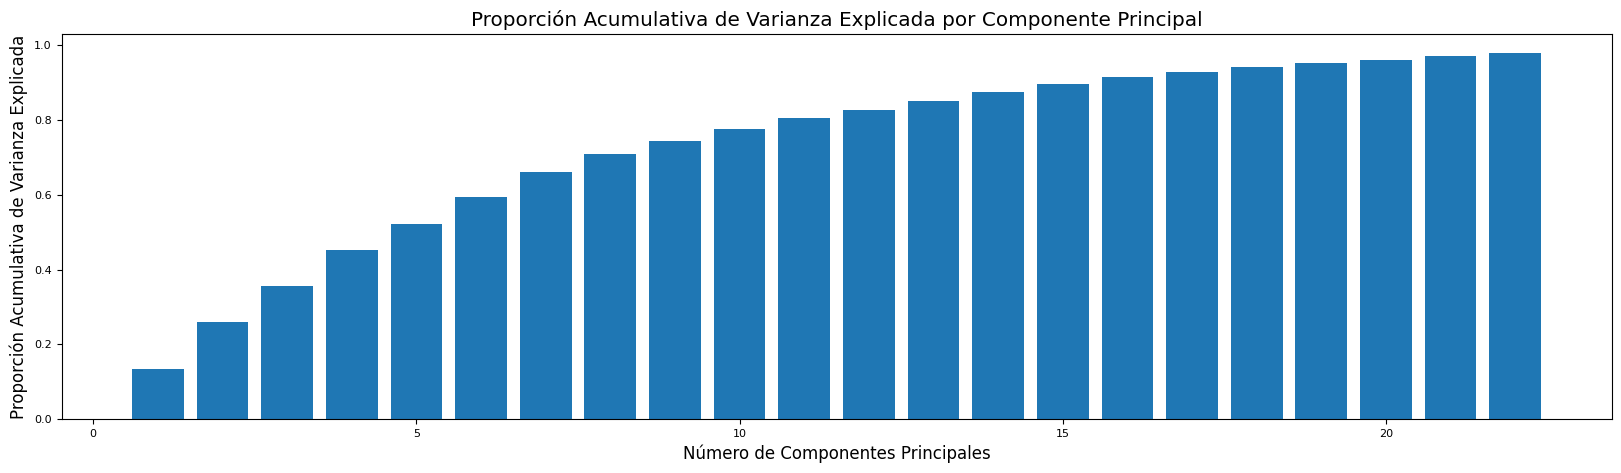

In [51]:
explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(1, figsize=(20, 5))
plt.bar(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, align='center')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción Acumulativa de Varianza Explicada')
plt.title('Proporción Acumulativa de Varianza Explicada por Componente Principal')
plt.show()

In [52]:
x_train, x_test, y_train, y_test = train_test_split(data_reduced, Delay_YesNo, test_size=0.2, random_state=42)

In [53]:
x_train

array([[-2.71377865,  0.39755573,  1.02125373, ..., -0.16265117,
         0.39020344, -0.07329616],
       [-2.10189361,  0.29007211, -0.57229533, ..., -1.13594645,
         0.23505716,  0.5051831 ],
       [-1.06587433,  0.66541393,  4.16830574, ..., -0.88286727,
        -1.00420389, -0.01329293],
       ...,
       [-3.1772729 , -2.31962993,  1.23092895, ...,  1.49479465,
        -0.75898635,  0.79498317],
       [ 3.35879537, -2.62401809,  0.70648573, ...,  0.79358331,
         1.65157976,  0.86059766],
       [-3.91613419,  0.30994417,  1.40479887, ..., -0.33234784,
        -1.12373641,  0.17329716]])

### REGRESION LOGISTICA

In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Dividir los datos en desarrollo y conjunto final de entrenamiento
x_train_final, x_dev, y_train_final, y_dev = train_test_split(data_reduced, Delay_YesNo, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
x_train_final_scaled = scaler.fit_transform(x_train_final)
x_dev_scaled = scaler.transform(x_dev)

# Crear el clasificador de Regresión Logística
logistic_regression = LogisticRegression()

# Definir el espacio de búsqueda de hiperparámetros
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Utilizar validación cruzada estratificada en el conjunto final de entrenamiento
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar búsqueda en cuadrícula para encontrar los mejores parámetros
grid_logistic = GridSearchCV(logistic_regression, param_grid_logistic, cv=kf, verbose=1, n_jobs=-1)
with tqdm(desc="Grid Search Progress") as pbar:
    grid_logistic.fit(x_train_final_scaled, y_train_final)
    pbar.update()

# Obtener el mejor modelo y los mejores parámetros
bestModel_logistic = grid_logistic.best_estimator_
bestParameters_logistic = grid_logistic.best_params_

# Imprimir el mejor modelo y los mejores parámetros
print("Best Logistic Regression Model:")
print(bestModel_logistic)
print("\nBest Logistic Regression Parameters:")
print(bestParameters_logistic)


Grid Search Progress: 0it [00:00, ?it/s]

Fitting 5 folds for each of 60 candidates, totalling 300 fits


Grid Search Progress: 1it [02:56, 176.97s/it]

Best Logistic Regression Model:
LogisticRegression(C=0.001, solver='saga')

Best Logistic Regression Parameters:
{'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}


In [64]:
bestModel = grid_logistic.best_estimator_
bestParameters = grid_logistic.best_params_
gridScores = grid_logistic.cv_results_


print(bestModel)
print(bestParameters)
gridScores


LogisticRegression(C=0.001, solver='saga')
{'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}


{'mean_fit_time': array([0.20317273, 0.20882459, 2.98774099, 0.34231148, 6.61927295,
        8.1070632 , 1.28980021, 2.76960301, 6.03083234, 5.53842444,
        0.17473221, 0.1909061 , 2.36034102, 0.25983057, 6.39632559,
        5.9695365 , 1.30567651, 2.27540741, 7.23409305, 5.74211497,
        0.23817782, 0.19022589, 2.13836141, 0.2630352 , 6.29969163,
        5.37492089, 1.18045564, 2.23229704, 7.25352097, 5.59638648,
        0.16894441, 0.17487059, 2.08251061, 0.22925262, 6.19944663,
        9.75389309, 1.21972156, 2.34290628, 7.62371325, 5.88977675,
        0.17838764, 0.18077369, 2.15234232, 0.24481211, 6.37977362,
        8.13639574, 1.2717968 , 2.61540217, 7.59428072, 5.52820854,
        0.17213864, 0.17094269, 2.20609727, 0.25431924, 6.52055368,
        7.96229649, 1.2079679 , 2.44406047, 7.64713922, 4.5998981 ]),
 'std_fit_time': array([9.92151298e-03, 7.14254621e-03, 2.54829001e-01, 7.83925703e-02,
        7.09620586e-01, 3.79933727e+00, 1.29038341e-01, 2.66670095e-01,
     

Confusion matrix (Development):
[[53492 24442]
 [30355 47857]]
Accuracy (Development): 64.91%
Recall (Development): 61.19%
Area under the ROC curve: 0.71


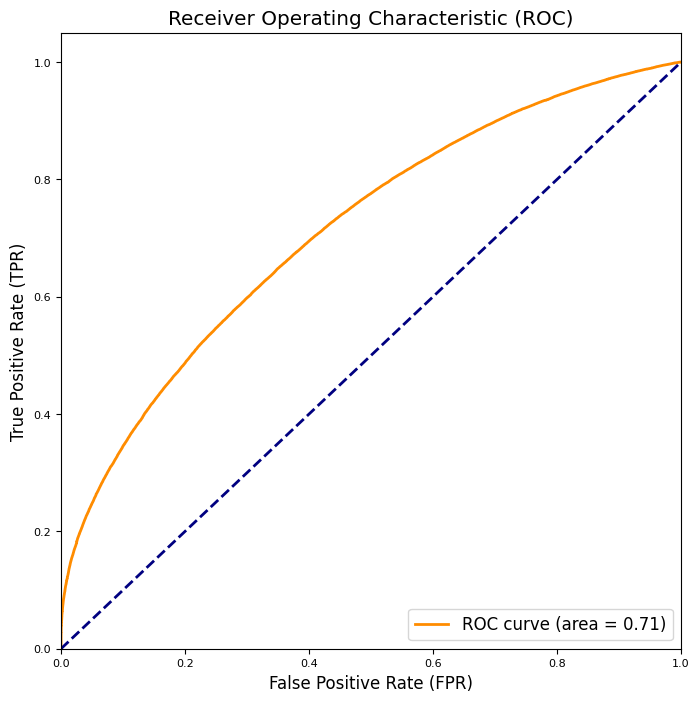

In [65]:

# Evaluar el modelo de Regresión Logística en el conjunto de desarrollo
y_logistic_pred_dev = bestModel_logistic.predict(x_dev_scaled)
y_logistic_pred_dev_probs = bestModel_logistic.predict_proba(x_dev_scaled)[:, 1]

# Calcular métricas de rendimiento en el conjunto de desarrollo
cm_logistic_dev = confusion_matrix(y_dev, y_logistic_pred_dev)
print('Confusion matrix (Development):')
print(cm_logistic_dev)

# Calcular e imprimir el accuracy y recall
accuracy_dev = (cm_logistic_dev[0, 0] + cm_logistic_dev[1, 1]) / np.sum(cm_logistic_dev)
recall_dev = cm_logistic_dev[1, 1] / (cm_logistic_dev[1, 0] + cm_logistic_dev[1, 1])

print('Accuracy (Development): {:.2%}'.format(accuracy_dev))
print('Recall (Development): {:.2%}'.format(recall_dev))

# Calcular métricas de rendimiento en el conjunto de desarrollo
fpr, tpr, thresholds = roc_curve(y_dev, y_logistic_pred_dev_probs)
roc_auc = auc(fpr, tpr)

# Imprimir métricas
print('Area under the ROC curve: {:.2f}'.format(roc_auc))

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('roc_logistic_regression_PCA.png')

plt.show()


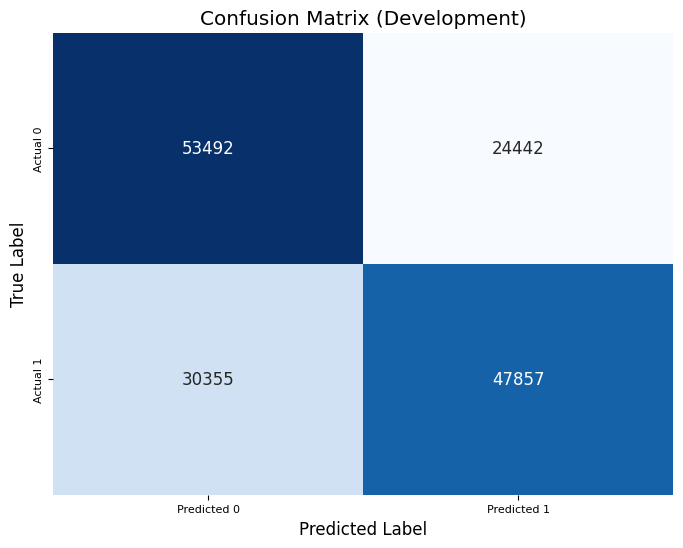

In [66]:



# Crear un DataFrame de la matriz de confusión para utilizar con seaborn
confusion_df = pd.DataFrame(cm_logistic_dev, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Mostrar la matriz de confusión con un diagrama utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Development)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Guardar la imagen de la matriz de confusión como un archivo PNG
plt.savefig('confusion_matrix_logistic_regression_PCA.png')

plt.show()



### RANDOM FOREST

In [67]:
x_train_final, x_dev, y_train_final, y_dev = train_test_split(data_reduced, Delay_YesNo, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10, 25],
                 "criterion" : ["gini", "entropy"]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=10,verbose=1,n_jobs=-1)
grid_rf.fit(x_train, y_train)
bestModel = grid_rf.best_estimator_
bestParameters = grid_rf.best_params_
gridScores = grid_rf.cv_results_


Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [68]:

print(bestModel)
print(bestParameters)
gridScores



RandomForestClassifier(criterion='entropy', n_estimators=25)
{'criterion': 'entropy', 'n_estimators': 25}


{'mean_fit_time': array([34.66412225, 84.85182014, 35.88289394, 83.99287364]),
 'std_fit_time': array([0.91345187, 0.80029169, 0.74221479, 7.46331967]),
 'mean_score_time': array([0.35733712, 0.82389603, 0.32542977, 0.66791933]),
 'std_score_time': array([0.01065848, 0.02198892, 0.01687866, 0.10827121]),
 'param_criterion': masked_array(data=['gini', 'gini', 'entropy', 'entropy'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 25, 10, 25],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'n_estimators': 10},
  {'criterion': 'gini', 'n_estimators': 25},
  {'criterion': 'entropy', 'n_estimators': 10},
  {'criterion': 'entropy', 'n_estimators': 25}],
 'split0_test_score': array([0.93960838, 0.95376167, 0.94252229, 0.95520261]),
 'split1_test_score': array([0.93624618, 0.94913463, 0.9362782 , 0.95321731]),


In [69]:


rf = RandomForestClassifier(n_estimators = bestParameters.get('n_estimators'), 
#                            min_samples_split=bestParameters.get('min_samples_split'),
#                           min_samples_leaf = bestParameters.get('min_samples_leaf'),
#                           max_features = bestParameters.get('max_features'),
                           criterion = bestParameters.get('criterion'))
cv = KFold(n_splits=3, shuffle=True, random_state=2)
cvScores = cross_validate(rf, x_train, y_train, cv=cv, scoring='accuracy', return_train_score=False)
print('Mean cross validation score is:', np.mean(cvScores['test_score']))
rf.fit(x_train, y_train)


Mean cross validation score is: 0.9487290724821218


RandomForestClassifier(criterion='entropy', n_estimators=25)

Accuracy: 95.35%
Recall: 95.66%
Confusion matrix:
[[74069  3865]
 [ 3393 74819]]


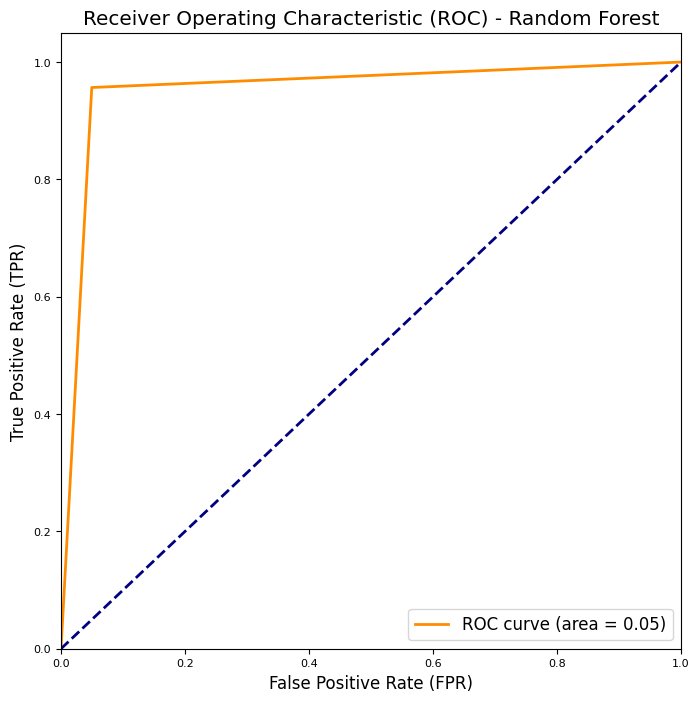

In [70]:




# Predicciones del modelo de Random Forest en el conjunto de prueba
y_rf_pred = rf.predict(x_test)

# Calcular métricas de rendimiento
labels = [0, 1]
cm_rf = confusion_matrix(y_test, y_rf_pred, labels=labels)

# Imprimir métricas de rendimiento
print('Accuracy: ' + str(np.round(100 * float(cm_rf[0][0] + cm_rf[1][1]) / float((cm_rf[0][0] + cm_rf[1][1] + cm_rf[1][0] + cm_rf[0][1])), 2)) + '%')
print('Recall: ' + str(np.round(100 * float((cm_rf[1][1])) / float((cm_rf[1][0] + cm_rf[1][1])), 2)) + '%')
print('Confusion matrix:')
print(cm_rf)

# Calcular curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_pred)
auc_rf = np.trapz(fpr_rf, tpr_rf)

# Gráfico de la curva ROC para Random Forest
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")

# Guardar la imagen de la curva ROC como un archivo PNG
plt.savefig('roc_random_forest_PCA.png')

plt.show()



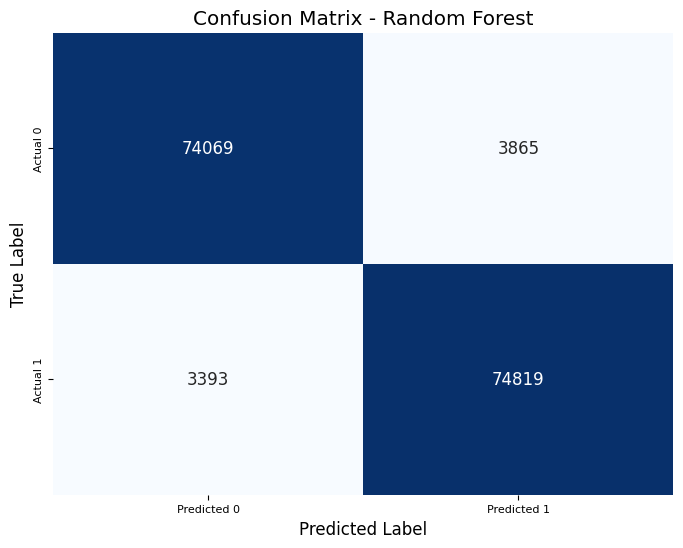

In [71]:

# Crear un DataFrame de la matriz de confusión para utilizar con seaborn
confusion_df_rf = pd.DataFrame(cm_rf, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Mostrar la matriz de confusión con un diagrama utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Guardar la imagen de la matriz de confusión como un archivo PNG
plt.savefig('confusion_matrix_random_forest_PCA.png')

plt.show()


### NAIVE BAYES

In [72]:
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

naive_bayes = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(data_reduced, Delay_YesNo, test_size=0.2, random_state=42)
# Utilizar validación cruzada para encontrar los mejores parámetros
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy',verbose=1)
grid_search.fit(x_train, y_train)

# Obtener el mejor modelo y los mejores parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Imprimir los mejores parámetros
print("Best Naive Bayes Model:")
print(best_model)
print("\nBest Parameters:")
print(best_params)

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(x_test)

# Imprimir métricas de rendimiento
print("\nAccuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Naive Bayes Model:
GaussianNB(var_smoothing=1e-05)

Best Parameters:
{'var_smoothing': 1e-05}

Accuracy on Test Set: 0.6264841878754499

Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.90      0.71     77934
         1.0       0.78      0.36      0.49     78212

    accuracy                           0.63    156146
   macro avg       0.68      0.63      0.60    156146
weighted avg       0.68      0.63      0.60    156146



Accuracy: 62.65%
Recall: 35.64%
Confusion matrix:
[[69949  7985]
 [50338 27874]]


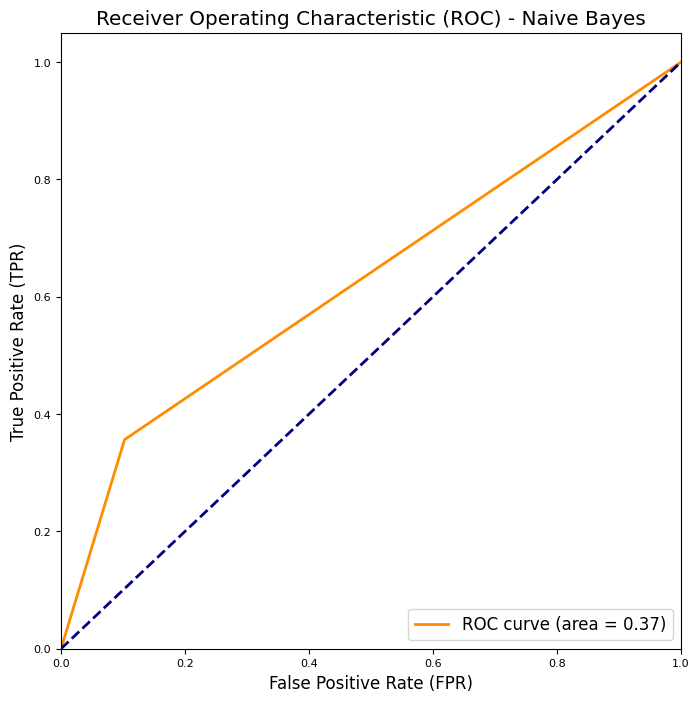

In [73]:
# Evaluar el modelo Naive Bayes en el conjunto de prueba
y_pred_naive_bayes = best_model.predict(x_test)
labels = [0, 1]
# Calcular métricas de rendimiento
cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes, labels=labels)
accuracy_naive_bayes = np.round(100 * float(cm_naive_bayes[0][0] + cm_naive_bayes[1][1]) / float((cm_naive_bayes[0][0] + cm_naive_bayes[1][1] + cm_naive_bayes[1][0] + cm_naive_bayes[0][1])), 2)
recall_naive_bayes = np.round(100 * float((cm_naive_bayes[1][1])) / float((cm_naive_bayes[1][0] + cm_naive_bayes[1][1])), 2)

# Imprimir métricas de rendimiento
print('Accuracy: ' + str(accuracy_naive_bayes) + '%')
print('Recall: ' + str(recall_naive_bayes) + '%')
print('Confusion matrix:')
print(cm_naive_bayes)

# Calcular curva ROC
fpr_naive_bayes, tpr_naive_bayes, _ = roc_curve(y_test, y_pred_naive_bayes)
auc_naive_bayes = np.trapz(fpr_naive_bayes, tpr_naive_bayes)

# Gráfico de la curva ROC para Naive Bayes
plt.figure(figsize=(8, 8))
plt.plot(fpr_naive_bayes, tpr_naive_bayes, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_naive_bayes))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes')
plt.legend(loc="lower right")

# Guardar la imagen de la curva ROC como un archivo PNG
plt.savefig('roc_naive_bayes_PCA.png')

plt.show()


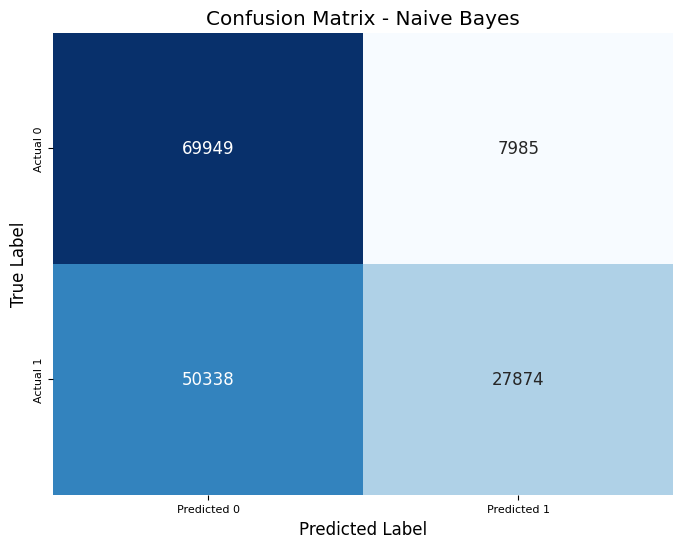

In [74]:
# Crear un DataFrame de la matriz de confusión para utilizar con seaborn
confusion_df_naive_bayes = pd.DataFrame(cm_naive_bayes, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Mostrar la matriz de confusión con un diagrama utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df_naive_bayes, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Guardar la imagen de la matriz de confusión como un archivo PNG
plt.savefig('confusion_matrix_naive_bayes_PCA.png')

plt.show()

### GRADIENT BOOSTING

In [75]:


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Crear el clasificador Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Realizar búsqueda en cuadrícula para encontrar los mejores parámetros
grid_gradient_boosting = RandomizedSearchCV(gradient_boosting, param_distributions=param_grid_gradient_boosting, cv=10, verbose=1, random_state=42,n_jobs=-1)
grid_gradient_boosting.fit(x_train[:10000], y_train[:10000])

# Obtener el mejor modelo y los mejores parámetros
bestModel_gradient_boosting = grid_gradient_boosting.best_estimator_
bestParameters_gradient_boosting = grid_gradient_boosting.best_params_

# Imprimir el mejor modelo y los mejores parámetros
print("Best Gradient Boosting Model:")
print(bestModel_gradient_boosting)
print("\nBest Gradient Boosting Parameters:")
print(bestParameters_gradient_boosting)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Gradient Boosting Model:
GradientBoostingClassifier(max_depth=5, n_estimators=150)

Best Gradient Boosting Parameters:
{'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1}


Accuracy: 83.96%
Recall: 80.61%
Confusion matrix:
[[68060  9874]
 [15169 63043]]
Area under the ROC curve: 0.16032208453778604


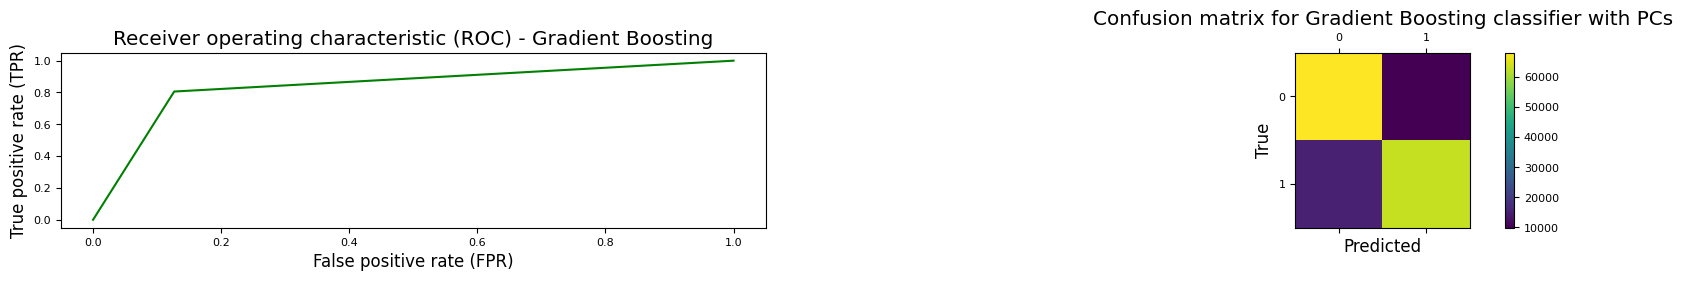

In [76]:

gradient_boosting = bestModel_gradient_boosting
# Evaluar el modelo Gradient Boosting en el conjunto de prueba
y_gradient_boosting_pred = gradient_boosting.predict(x_test)

# Calcular métricas de rendimiento
cm_gradient_boosting = confusion_matrix(y_test, y_gradient_boosting_pred, labels=labels)
print('Accuracy: ' + str(np.round(100 * float(cm_gradient_boosting[0][0] + cm_gradient_boosting[1][1]) / float((cm_gradient_boosting[0][0] + cm_gradient_boosting[1][1] + cm_gradient_boosting[1][0] + cm_gradient_boosting[0][1])), 2)) + '%')
print('Recall: ' + str(np.round(100 * float((cm_gradient_boosting[1][1])) / float((cm_gradient_boosting[1][0] + cm_gradient_boosting[1][1])), 2)) + '%')
print('Confusion matrix:')
print(cm_gradient_boosting)

fpr_gradient_boosting, tpr_gradient_boosting, _ = roc_curve(y_test, y_gradient_boosting_pred)
auc_gradient_boosting = np.trapz(fpr_gradient_boosting, tpr_gradient_boosting)
print('Area under the ROC curve: ' + str(auc_gradient_boosting))

# Gráficos para Gradient Boosting
fig_gradient_boosting = plt.figure(figsize=(20, 5))

plt.subplot2grid((2, 2), (1, 0), colspan=1)
plt.plot(fpr_gradient_boosting, tpr_gradient_boosting, color='green')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC) - Gradient Boosting')

ax1_gradient_boosting = plt.subplot2grid((2, 2), (1, 1))
cax_gradient_boosting = ax1_gradient_boosting.matshow(cm_gradient_boosting)
plt.title('Confusion matrix for Gradient Boosting classifier with PCs')
fig_gradient_boosting.colorbar(cax_gradient_boosting)
ax1_gradient_boosting.set_xticklabels([''] + labels)
ax1_gradient_boosting.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## MATRIZ DE CORRELACION DE DATOS 

In [ ]:

correlation_matrix = dataset1.corr()


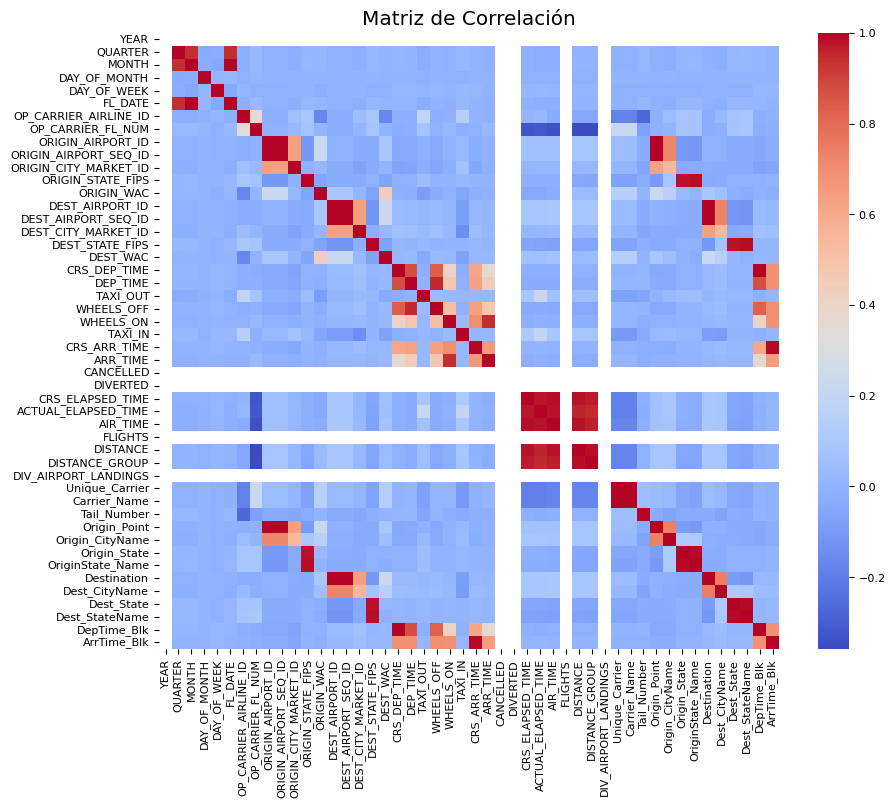

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de correlación como un mapa de calor sin números
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
# Eliminar características altamente correlacionadas
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

rfDataOriginal = dataset1.drop(high_corr_features, axis=1)


In [ ]:
rfDataOriginal

,YEAR,QUARTER,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,...,CRS_ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,FLIGHTS,DIV_AIRPORT_LANDINGS,Unique_Carrier,Tail_Number,Origin_CityName,Dest_CityName
62,2023,3,31,4,19790,2346,13930,30977,17,41,...,2356,0.0,0.0,151.0,1.0,0,4,143,61,40
193,2023,3,31,4,19977,2417,14869,34614,49,87,...,1155,0.0,0.0,190.0,1.0,0,12,3684,275,61
347,2023,3,31,4,20363,5490,12953,31703,36,22,...,1215,0.0,0.0,155.0,1.0,0,0,1389,223,220
408,2023,3,31,4,19790,2486,12441,32441,56,88,...,800,0.0,0.0,60.0,1.0,0,4,1551,153,275
452,2023,3,31,4,19805,2471,14986,34986,12,33,...,2034,0.0,0.0,114.0,1.0,0,1,4102,289,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780098,2023,1,1,3,20368,639,10627,30627,38,66,...,2136,0.0,0.0,175.0,1.0,0,6,11,37,246
780517,2023,1,1,3,20436,746,11292,30325,8,82,...,2125,0.0,0.0,219.0,1.0,0,5,1330,84,135
780552,2023,1,1,3,20304,5564,14457,34457,46,67,...,900,0.0,0.0,96.0,1.0,0,11,688,259,84
780602,2023,1,1,3,19790,534,10397,30397,13,34,...,2037,0.0,0.0,102.0,1.0,0,4,1678,18,329
